<a href="https://colab.research.google.com/github/N4SIRODDIN3/Aspose.HTML-for-.NET/blob/master/chapter_preliminaries/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing
:label:`sec_pandas`

So far, we have been working with synthetic data
that arrived in ready-made tensors.
However, to apply deep learning in the wild
we must extract messy data
stored in arbitrary formats,
and preprocess it to suit our needs.
Fortunately, the *pandas* [library](https://pandas.pydata.org/)
can do much of the heavy lifting.
This section, while no substitute
for a proper *pandas* [tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html),
will give you a crash course
on some of the most common routines.

## Reading the Dataset

Comma-separated values (CSV) files are ubiquitous
for the storing of tabular (spreadsheet-like) data.
In them, each line corresponds to one record
and consists of several (comma-separated) fields, e.g.,
"Albert Einstein,March 14 1879,Ulm,Federal polytechnic school,field of gravitational physics".
To demonstrate how to load CSV files with `pandas`,
we (**create a CSV file below**) `../data/house_tiny.csv`.
This file represents a dataset of homes,
where each row corresponds to a distinct home
and the columns correspond to the number of rooms (`NumRooms`),
the roof type (`RoofType`), and the price (`Price`).


In [2]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

Now let's import `pandas` and load the dataset with `read_csv`.


In [3]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


## Data Preparation

In supervised learning, we train models
to predict a designated *target* value,
given some set of *input* values.
Our first step in processing the dataset
is to separate out columns corresponding
to input versus target values.
We can select columns either by name or
via integer-location based indexing (`iloc`).

You might have noticed that `pandas` replaced
all CSV entries with value `NA`
with a special `NaN` (*not a number*) value.
This can also happen whenever an entry is empty,
e.g., "3,,,270000".
These are called *missing values*
and they are the "bed bugs" of data science,
a persistent menace that you will confront
throughout your career.
Depending upon the context,
missing values might be handled
either via *imputation* or *deletion*.
Imputation replaces missing values
with estimates of their values
while deletion simply discards
either those rows or those columns
that contain missing values.

Here are some common imputation heuristics.
[**For categorical input fields,
we can treat `NaN` as a category.**]
Since the `RoofType` column takes values `Slate` and `NaN`,
`pandas` can convert this column
into two columns `RoofType_Slate` and `RoofType_nan`.
A row whose roof type is `Slate` will set values
of `RoofType_Slate` and `RoofType_nan` to 1 and 0, respectively.
The converse holds for a row with a missing `RoofType` value.


In [4]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2] #inputs = NumRooms RoofType, targets=price
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


For missing numerical values,
one common heuristic is to
[**replace the `NaN` entries with
the mean value of the corresponding column**].


In [5]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


## Conversion to the Tensor Format

Now that [**all the entries in `inputs` and `targets` are numerical,
we can load them into a tensor**] (recall :numref:`sec_ndarray`).


In [6]:
import tensorflow as tf

X = tf.constant(inputs.to_numpy(dtype=float)) # to tf.tensor(from pandas to numpy)
y = tf.constant(targets.to_numpy(dtype=float))
X, y

(<tf.Tensor: shape=(4, 3), dtype=float64, numpy=
 array([[3., 0., 1.],
        [2., 0., 1.],
        [4., 1., 0.],
        [3., 0., 1.]])>,
 <tf.Tensor: shape=(4,), dtype=float64, numpy=array([127500., 106000., 178100., 140000.])>)

In [7]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## Discussion

You now know how to partition data columns,
impute missing variables,
and load `pandas` data into tensors.
In :numref:`sec_kaggle_house`, you will
pick up some more data processing skills.
While this crash course kept things simple,
data processing can get hairy.
For example, rather than arriving in a single CSV file,
our dataset might be spread across multiple files
extracted from a relational database.
For instance, in an e-commerce application,
customer addresses might live in one table
and purchase data in another.
Moreover, practitioners face myriad data types
beyond categorical and numeric, for example,
text strings, images,
audio data, and point clouds.
Oftentimes, advanced tools and efficient algorithms
are required in order to prevent data processing from becoming
the biggest bottleneck in the machine learning pipeline.
These problems will arise when we get to
computer vision and natural language processing.
Finally, we must pay attention to data quality.
Real-world datasets are often plagued
by outliers, faulty measurements from sensors, and recording errors,
which must be addressed before
feeding the data into any model.
Data visualization tools such as [seaborn](https://seaborn.pydata.org/),
[Bokeh](https://docs.bokeh.org/), or [matplotlib](https://matplotlib.org/)
can help you to manually inspect the data
and develop intuitions about
the type of problems you may need to address.


## Exercises

1. Try loading datasets, e.g., Abalone from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?
1. Try indexing and selecting data columns by name rather than by column number. The pandas documentation on [indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) has further details on how to do this.
1. How large a dataset do you think you could load this way? What might be the limitations? Hint: consider the time to read the data, representation, processing, and memory footprint. Try this out on your laptop. What happens if you try it out on a server?
1. How would you deal with data that has a very large number of categories? What if the category labels are all unique? Should you include the latter?
1. What alternatives to pandas can you think of? How about [loading NumPy tensors from a file](https://numpy.org/doc/stable/reference/generated/numpy.load.html)? Check out [Pillow](https://python-pillow.org/), the Python Imaging Library.


[Discussions](https://discuss.d2l.ai/t/29)


This fraction has missing values 0.0
This is numeric: 
       Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455    

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

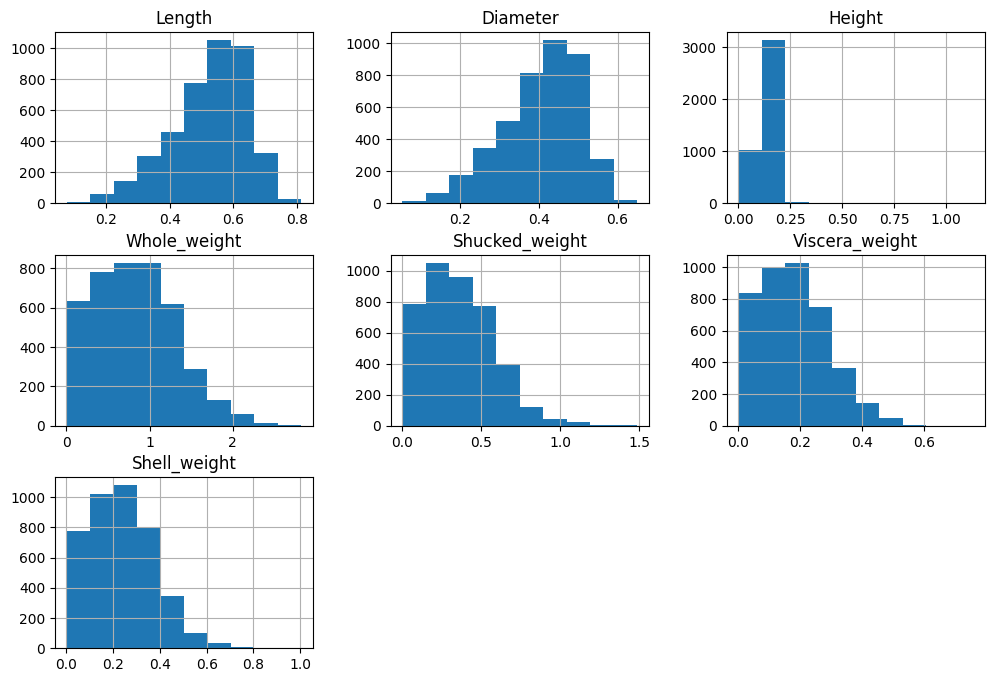

In [9]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
dataset = fetch_ucirepo(id = 1) # choose different ids
X = dataset.data.features
y = dataset.data.targets
x = pd.get_dummies(X, dummy_na=True)
# count the number of NaN in each column'
nofnan = x.isnull().sum()
# 1.What fraction of them has missing values?
print('This fraction has missing values', nofnan[nofnan>0].sum()/x.shape[0])

# print numeric values
import numpy as np
# Convert specific columns to a numeric type, for example, float64
print('This is numeric: \n', x.select_dtypes(include=['number']))
# print categorical values
print('This is Categorical: \n',x.select_dtypes(include=['category']))
# print text values
print('This is string: \n',x.select_dtypes(include=['object']))


# 2.print using label indexing instead integers
print('Using label indexing: \n', X[X['Diameter']<0.2]) # show all rows when Diameter col < 0.2

# Visualizing data
pd.plotting.hist_frame(x, figsize=(12,8))